In [1]:
# black friday data set 
#cleaning andprparing the data for model traning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [3]:
#importing the data set
df_train=pd.read_csv("friday_train.csv")
df_train.shape



(550068, 12)

In [4]:
df_test=pd.read_csv("friday_test.csv")

In [5]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
#merging the data sets
df=df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.100136e+06,1.100136e+06,1.100136e+06,1.100136e+06,752860.000000,333642.000000,1.100136e+06
mean,1.003029e+06,8.076707e+00,4.096530e-01,5.404270e+00,9.842329,12.668243,9.263969e+03
std,1.727591e+03,6.522658e+00,4.917699e-01,3.936210e+00,5.086586,4.125331,5.023063e+03
min,1.000001e+06,0.000000e+00,0.000000e+00,1.000000e+00,2.000000,3.000000,1.200000e+01
25%,1.001516e+06,2.000000e+00,0.000000e+00,1.000000e+00,5.000000,9.000000,5.823000e+03
50%,1.003077e+06,7.000000e+00,0.000000e+00,5.000000e+00,9.000000,14.000000,8.047000e+03
75%,1.004478e+06,1.400000e+01,1.000000e+00,8.000000e+00,15.000000,16.000000,1.205400e+04
max,1.006040e+06,2.000000e+01,1.000000e+00,2.000000e+01,18.000000,18.000000,2.396100e+04


In [8]:
#dropping the column
df.drop(['User_ID'],axis=1,inplace=True)

In [9]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
df.isnull()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,True,True,False
550064,False,False,False,False,False,False,False,False,True,True,False
550065,False,False,False,False,False,False,False,False,True,True,False
550066,False,False,False,False,False,False,False,False,True,True,False


In [11]:
#map()-easy condition we can give
#handling categorical
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [12]:
#handling categorical feature
df['Gender'].unique()

array([0, 1], dtype=int64)

In [13]:
df.head(1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370


In [14]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [15]:
df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [16]:
df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [18]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [19]:
df_city=pd.get_dummies(df['City_Category'])

In [20]:
df.drop('City_Category',axis=1,inplace=True)

In [21]:
df=pd.concat([df,df_city],axis=1)

In [22]:
df.head(1)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370,1,0,0


In [23]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            347276
Product_Category_3            766494
Purchase                           0
A                                  0
B                                  0
C                                  0
dtype: int64

In [24]:
df_test['Purchase']

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [25]:
# focusing the missing values

In [26]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [27]:
df['Product_Category_2'].value_counts()

8.0     128176
14.0    110216
2.0      98434
16.0     86510
15.0     75710
5.0      52470
4.0      51354
6.0      32932
11.0     28268
17.0     26640
13.0     21062
9.0      11386
12.0     11056
10.0      6086
3.0       5768
18.0      5540
7.0       1252
Name: Product_Category_2, dtype: int64

In [28]:
# Replacce the missing values with mode

In [29]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [30]:
df['Product_Category_2'].isnull().sum()

0

In [31]:
df['Product_Category_3'].isnull().sum()

766494

In [32]:
df['Product_Category_3'].value_counts()

16.0    65272
15.0    56026
14.0    36856
17.0    33404
5.0     33316
8.0     25124
9.0     23158
12.0    18492
13.0    10918
6.0      9780
18.0     9258
4.0      3750
11.0     3610
10.0     3452
3.0      1226
Name: Product_Category_3, dtype: int64

In [33]:
df['Product_Category_3'].mode()[0]

16.0

In [34]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [35]:
df['Product_Category_3'].value_counts()

16.0    831766
15.0     56026
14.0     36856
17.0     33404
5.0      33316
8.0      25124
9.0      23158
12.0     18492
13.0     10918
6.0       9780
18.0      9258
4.0       3750
11.0      3610
10.0      3452
3.0       1226
Name: Product_Category_3, dtype: int64

In [36]:
df['Product_Category_3'].isnull().sum()

0

In [37]:
df['product_category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [38]:
df.shape

(1100136, 14)

In [39]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'A', 'B', 'C',
       'product_category_3'],
      dtype='object')

In [40]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [41]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\vdeva\AppData\Local\Temp/ipykernel_20096/2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [42]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100136 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  1100136 non-null  object 
 1   Gender                      1100136 non-null  int64  
 2   Age                         1100136 non-null  int64  
 3   Occupation                  1100136 non-null  int64  
 4   Stay_In_Current_City_Years  1100136 non-null  object 
 5   Marital_Status              1100136 non-null  int64  
 6   Product_Category_1          1100136 non-null  int64  
 7   Product_Category_2          1100136 non-null  float64
 8   Product_Category_3          1100136 non-null  float64
 9   Purchase                    1100136 non-null  int64  
 10  A                           1100136 non-null  uint8  
 11  B                           1100136 non-null  uint8  
 12  C                           1100136 non-null  uint8  
 13

In [44]:
#Converting data type 

In [45]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100136 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  1100136 non-null  object 
 1   Gender                      1100136 non-null  int64  
 2   Age                         1100136 non-null  int64  
 3   Occupation                  1100136 non-null  int64  
 4   Stay_In_Current_City_Years  1100136 non-null  int32  
 5   Marital_Status              1100136 non-null  int64  
 6   Product_Category_1          1100136 non-null  int64  
 7   Product_Category_2          1100136 non-null  float64
 8   Product_Category_3          1100136 non-null  float64
 9   Purchase                    1100136 non-null  int64  
 10  A                           1100136 non-null  uint8  
 11  B                           1100136 non-null  uint8  
 12  C                           1100136 non-null  uint8  
 13

In [47]:
df['A']=df['A'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100136 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  1100136 non-null  object 
 1   Gender                      1100136 non-null  int64  
 2   Age                         1100136 non-null  int64  
 3   Occupation                  1100136 non-null  int64  
 4   Stay_In_Current_City_Years  1100136 non-null  int32  
 5   Marital_Status              1100136 non-null  int64  
 6   Product_Category_1          1100136 non-null  int64  
 7   Product_Category_2          1100136 non-null  float64
 8   Product_Category_3          1100136 non-null  float64
 9   Purchase                    1100136 non-null  int64  
 10  A                           1100136 non-null  int32  
 11  B                           1100136 non-null  int32  
 12  C                           1100136 non-null  int32  
 13

In [49]:
#visulization

C:\Users\vdeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

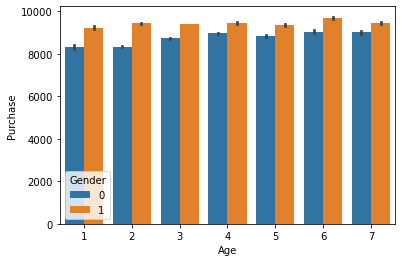

In [50]:
sns.barplot('Age','Purchase',hue='Gender',data=df)

by this visulization 
the info we got is  men will buy more than women

In [51]:
#visulization of pruchase with occupation
#sns.barplot('Purchase','Occupation',hue='Gender',data=df)

In [52]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'A', 'B', 'C',
       'product_category_3'],
      dtype='object')

In [57]:

df[df['Purchase'].isnull()]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C,product_category_3


In [58]:
df_test=df[df['Purchase'].isnull()]

In [94]:
df_train=df[~df['Purchase'].isnull()]


In [60]:
df_test

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C,product_category_3


In [61]:
df_train

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C,product_category_3
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370,1,0,0,16.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,1,0,0,14.0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422,1,0,0,16.0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057,1,0,0,16.0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969,0,0,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,16.0,368,0,1,0,16.0
550064,P00375436,0,3,1,3,0,20,8.0,16.0,371,0,0,1,16.0
550065,P00375436,0,3,15,4,1,20,8.0,16.0,137,0,1,0,16.0
550066,P00375436,0,7,1,2,0,20,8.0,16.0,365,0,0,1,16.0


In [95]:
X=df_train.drop('Purchase',axis=1)

In [93]:
X.shape

(1100136, 12)

In [104]:
X=df_train.drop('Product_ID',axis=1)

In [108]:
Y=df_train[::-1]

In [106]:
Y.shape

(1100136, 14)

In [107]:
Y.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
A                             0
B                             0
C                             0
product_category_3            0
dtype: int64

In [109]:
X

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C,product_category_3
0,0,1,10,2,0,3,8.0,16.0,8370,1,0,0,16.0
1,0,1,10,2,0,1,6.0,14.0,15200,1,0,0,14.0
2,0,1,10,2,0,12,8.0,16.0,1422,1,0,0,16.0
3,0,1,10,2,0,12,14.0,16.0,1057,1,0,0,16.0
4,1,7,16,4,0,8,8.0,16.0,7969,0,0,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,368,0,1,0,16.0
550064,0,3,1,3,0,20,8.0,16.0,371,0,0,1,16.0
550065,0,3,15,4,1,20,8.0,16.0,137,0,1,0,16.0
550066,0,7,1,2,0,20,8.0,16.0,365,0,0,1,16.0


In [96]:
X_test.drop('Product_ID',axis=1,inplace=True)

C:\Users\vdeva\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [111]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)